## DecisionTree and Ensenble
> sklearn.tree.DecisionTreeClassifier
* DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))  

예측정확도: 0.9667


In [3]:
dt_clf.feature_importances_


array([0.00750469, 0.03126954, 0.58827442, 0.37295135])

In [4]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### graphviz를 활용한 tree 확인
> sklearn.tree.export_graphviz
* export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')

In [5]:
from sklearn.tree import export_graphviz

In [6]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

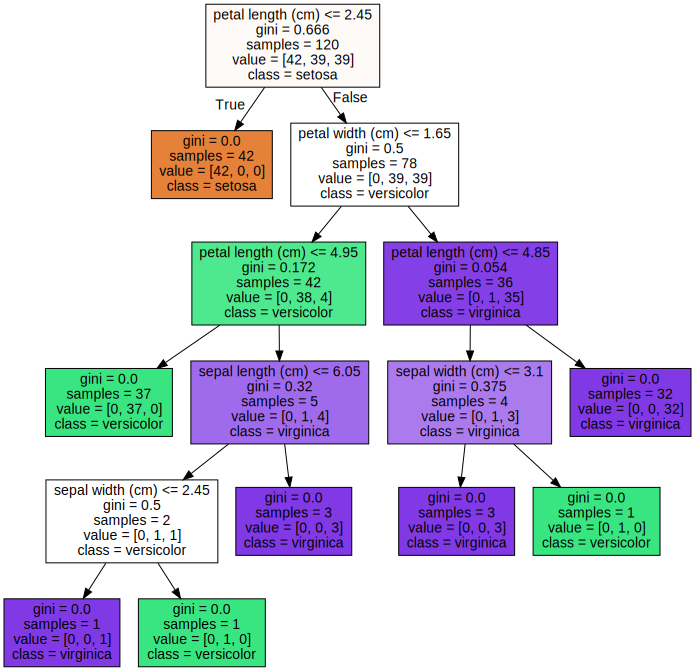

In [7]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notevbook 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### max_depth = 3

In [9]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=52)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))  

예측정확도: 0.9667


In [10]:
export_graphviz(dt_clf, out_file="tree_max_depth.dot", class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

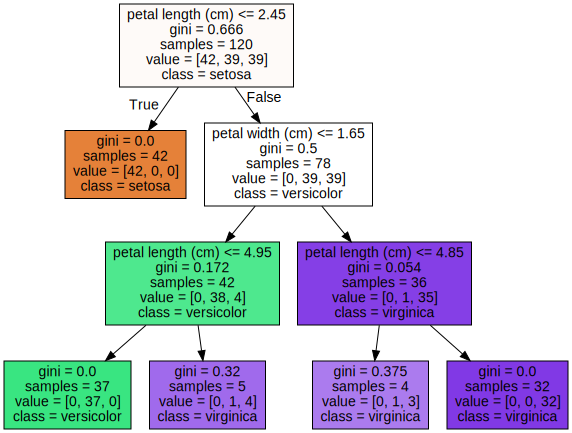

In [12]:
with open("tree_max_depth.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 리프노드 5개 

#### min_samples_split = 4

In [31]:
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=52)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))  

예측정확도: 0.9667


In [32]:
export_graphviz(dt_clf, out_file="tree_min_split.dot", class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

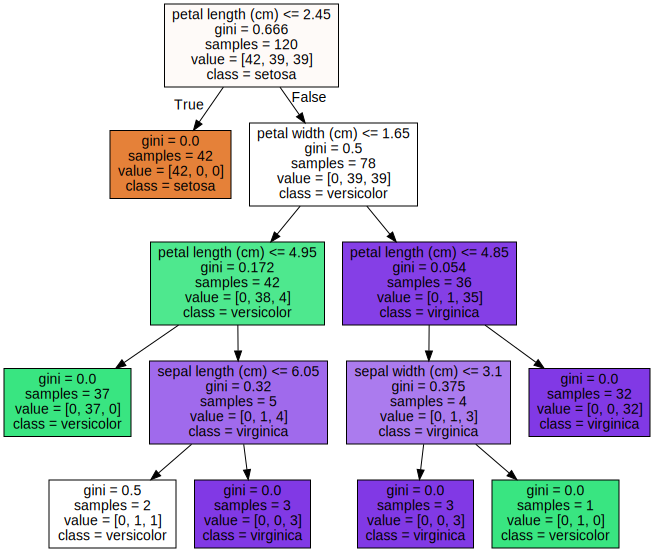

In [33]:
with open("tree_min_split.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 리프노드 7개 

#### min_samples_leat = 4

In [43]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=52)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=36)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))  

예측정확도: 0.9667


In [44]:
export_graphviz(dt_clf, out_file="tree_min_leaf.dot", class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

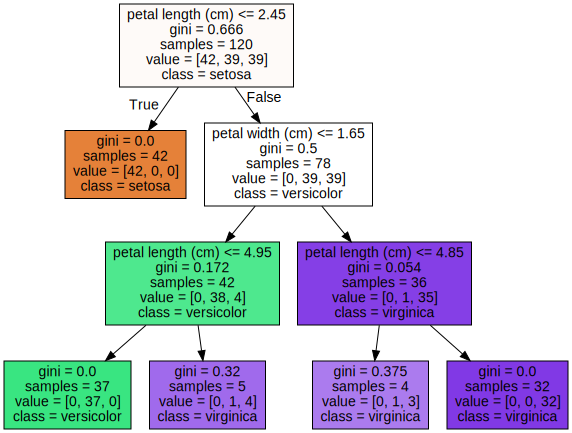

In [45]:
with open("tree_min_split.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
# 리프노드 5개 

In [66]:
import pandas as pd
human_activity = pd.read_csv('human_activity.csv')
human_activity.info()
human_activity.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [67]:
df = human_activity.iloc[:,0:10]

In [68]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610


In [80]:
label = human_activity.iloc[:,  -1]
label

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 2947, dtype: object

In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
fitted = encoder.fit_transform(label)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, fitted, test_size=0.2, random_state=110)

In [89]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.6644067796610169


In [100]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv =5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.6987576019288207
{'max_depth': 10}


In [107]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
accuracy

0.6644067796610169

In [108]:
best_dt_clf = DecisionTreeClassifier(max_depth=10, random_state=156)
best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=156)

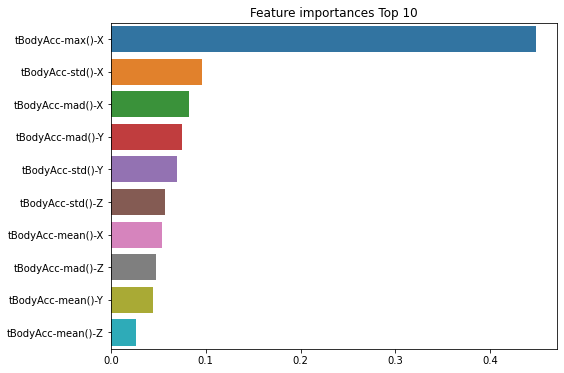

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_value = best_dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_value, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()

In [102]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.671613
1,8,0.694519
2,10,0.698758
3,12,0.690279
4,16,0.687304
5,20,0.685186
6,24,0.685186


In [106]:
max_depth = [6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth', depth, '정확도', accuracy)

max_depth 6 정확도 0.6610169491525424
max_depth 8 정확도 0.6694915254237288
max_depth 10 정확도 0.6644067796610169
max_depth 12 정확도 0.6661016949152543
max_depth 16 정확도 0.6728813559322034
max_depth 20 정확도 0.6593220338983051
max_depth 24 정확도 0.6644067796610169


### Ensenble
* hard / soft voting


In [1]:
print('hello')

hello
